## Exercise 2.1: ε-greedy action selection

In ε-greedy action selection, the algorithm chooses the greedy action with a probability of $1 - \varepsilon + \frac{\varepsilon}{\text{number of actions}}$ and selects a non-greedy (exploratory) action with a probability of $\frac{\varepsilon}{\text{number of actions}}$.

For the case of two actions ($\text{number of actions} = 2$) and $\varepsilon = 0.5$, the probability of selecting the greedy action is:

$$1 - \varepsilon + \frac{\varepsilon}{\text{number of actions}}$$

Substitute the values:

$$1 - 0.5 + \frac{0.5}{2} = 1 - 0.5 + 0.25 = 0.75$$

So, when $\varepsilon$ is 0.5 and there are two actions, the probability of selecting the greedy action is 0.75 or 75%.

## Exercise 2.2: Bandit example


### Given Information:
- $k = 4$ actions: 1, 2, 3, 4
- Initial estimates of $Q_1(a) = 0$ for all $a$
- Sequence of actions and rewards: $A_1 = 1, R_1 = -1$, $A_2 = 2, R_2 = 1$, $A_3 = 2, R_3 = -2$, $A_4 = 2, R_4 = 2$, $A_5 = 3, R_5 = 0$
- $\epsilon$-greedy action selection: with probability $\epsilon$, a random action is selected; with probability $1 - \epsilon$, the action with the highest estimated value is selected
- Sample-average action-value estimates

### Step-by-Step Analysis

1. **Initial values:**
   - $Q_1(1) = Q_1(2) = Q_1(3) = Q_1(4) = 0$

2. **Step 1: $A_1 = 1$, $R_1 = -1$**
   - Update $Q$ value for action 1:
     $$
     Q_2(1) = \frac{-1}{1} = -1
     $$
   - $Q_2(2) = 0$, $Q_2(3) = 0$, $Q_2(4) = 0$
   - Action 1 was selected. This could have been an $\epsilon$-greedy action because all $Q$ values were initially equal.

3. **Step 2: $A_2 = 2$, $R_2 = 1$**
   - Update $Q$ value for action 2:
     $$
     Q_3(2) = \frac{1}{1} = 1
     $$
   - $Q_3(1) = -1$, $Q_3(3) = 0$, $Q_3(4) = 0$
   - Action 2 was selected. Since $Q_2(1) = -1$ and $Q_2(2) = 0$, action 2 might have been selected as the best estimated value or due to $\epsilon$-greedy.

4. **Step 3: $A_3 = 2$, $R_3 = -2$**
   - Update $Q$ value for action 2:
     $$
     Q_4(2) = \frac{1 + (-2)}{2} = \frac{-1}{2} = -0.5
     $$
   - $Q_4(1) = -1$, $Q_4(3) = 0$, $Q_4(4) = 0$
   - Action 2 was selected. Since $Q_3(2) = 1$ and $Q_3(1) = -1$, action 2 was likely selected because it had the highest estimated value at that time.

5. **Step 4: $A_4 = 2$, $R_4 = 2$**
   - Update $Q$ value for action 2:
     $$
     Q_5(2) = \frac{1 + (-2) + 2}{3} = \frac{1}{3} \approx 0.33
     $$
   - $Q_5(1) = -1$, $Q_5(3) = 0$, $Q_5(4) = 0$
   - Action 2 was selected. Given that $Q_4(2) = -0.5$ was better than $Q_4(1) = -1$, action 2 should not have been selected because $Q_4(2) < Q_4(3)$ and $Q_4(4)$, indicating an $\epsilon$-greedy choice.

6. **Step 5: $A_5 = 3$, $R_5 = 0$**
   - Update $Q$ value for action 3:
     $$
     Q_6(3) = \frac{0}{1} = 0
     $$
   - $Q_6(1) = -1$, $Q_6(2) \approx 0.33$, $Q_6(3) = 0$, $Q_6(4) = 0$
   - Action 3 was selected. Since $Q_5(2) \approx 0.33$ was the highest value at this time, choosing action 3 indicates it was an $\epsilon$-greedy choice.

### Conclusion
- **Definitely $\epsilon$-greedy**:
  - Step 4: $A_4 = 2$ (because $Q_4(2) = -0.5$ was not the highest $Q$ value)
  - Step 5: $A_5 = 3$ (because $Q_5(2) \approx 0.33$ was the highest $Q$ value)

- **Possibly $\epsilon$-greedy**:
  - Step 1: $A_1 = 1$ (initial $Q$ values were equal, so it could have been a random choice)
  - Step 2: $A_2 = 2$ (could have been chosen either due to the $\epsilon$-greedy strategy or because $Q_2(2)$ was better than $Q_2(1)$)
  - Step 3: $A_3 = 2$ (likely chosen because $Q_3(2) = 1$ was the highest at that time)

### Table of $Q$ Values

| Step | Action ($A_t$) | Reward ($R_t$) | $Q(1)$ | $Q(2)$ | $Q(3)$ | $Q(4)$ |
|------|------------------|------------------|----------|----------|----------|----------|
| 0    | -                | -                | 0        | 0        | 0        | 0        |
| 1    | 1                | -1               | -1       | 0        | 0        | 0        |
| 2    | 2                | 1                | -1       | 1        | 0        | 0        |
| 3    | 2                | -2               | -1       | -0.5     | 0        | 0        |
| 4    | 2                | 2                | -1       | 0.33     | 0        | 0        |
| 5    | 3                | 0                | -1       | 0.33     | 0        | 0        |

This table helps in understanding the evolution of the $Q$ values after each action and reward, clearly showing the estimated values for each action at each step.

## Exercise 2.3

The $\epsilon = 0.01$ method provides the best balance between exploration and exploitation, resulting in higher cumulative rewards and a greater probability of selecting the best action over time.

## Exercise 2.4

### General Case with Non-Constant Step-Size Parameters

Given the update rule:
$$ Q_{n+1} = Q_n + \alpha_n (R_n - Q_n) $$

We need to expand this recursively to express $Q_{n+1}$ in terms of all previous rewards and step-size parameters.

### Derivation

1. **Initial Step:**
   $$ Q_1 $$

2. **First Update:**
   $$ Q_2 = Q_1 + \alpha_1 (R_1 - Q_1) $$

3. **Second Update:**
   $$ Q_3 = Q_2 + \alpha_2 (R_2 - Q_2) $$

   Substituting $Q_2$:
   $$\begin{aligned}
   Q_3 =& Q_1 + \alpha_1 (R_1 - Q_1) + \alpha_2 (R_2 - (Q_1 + \alpha_1 (R_1 - Q_1))) \\
       =& Q_1 + \alpha_1 (R_1 - Q_1) + \alpha_2 (R_2 - Q_1 - \alpha_1 R_1 + \alpha_1 Q_1) \\
       =& Q_1 (1 - \alpha_1)(1 - \alpha_2) + \alpha_1 R_1 (1 - \alpha_2) + \alpha_2 R_2
   \end{aligned}
   $$

4. **General Case:**

   For $Q_{n+1}$:
   $$
   Q_{n+1} = Q_n + \alpha_n (R_n - Q_n)
   $$

   Let's express $Q_n$ in terms of all previous rewards:
   $$
   Q_{n+1} = Q_1 \prod_{i=1}^n (1 - \alpha_i) + \sum_{k=1}^n \left[ \alpha_k R_k \prod_{j=k+1}^n (1 - \alpha_j) \right]
   $$

   This expression shows that each reward $R_k$ is weighted by the product of the step-size parameter $\alpha_k$ and the product of $(1 - \alpha_j)$ for all subsequent steps $j$ up to $n$.

### Weighting on Each Prior Reward

In summary, the weighting on each prior reward $R_k$ for $Q_{n+1}$ is:
$$ \text{Weighting on } R_k = \alpha_k \prod_{j=k+1}^n (1 - \alpha_j) $$

This formula indicates that the weight of each reward diminishes over time, depending on the sequence of step-size parameters.

### Conclusion

The weighting on each prior reward for the general case, analogous to equation (2.6) in terms of the sequence of step-size parameters $\alpha_n$, is given by:
$$ \alpha_k \prod_{j=k+1}^n (1 - \alpha_j) $$

This shows how each reward contributes to the current estimate $Q_n$ when the step-size parameters are not constant.

## Exercise 2.5 (programming)

To address Exercise 2.5, we'll design an experiment using the 10-armed bandit problem to demonstrate the difficulties that sample-average methods have for nonstationary problems. We will compare two methods:
1. An action-value method using sample averages.
2. An action-value method using a constant step-size parameter ($\alpha = 0.1$).

### Experiment Setup

1. **10-Armed Testbed:**
   - Each action $a$ has an initial value $q_*(a) = 0$.
   - At each step, each $q_*(a)$ undergoes a random walk by adding a normally distributed increment with mean 0 and standard deviation 0.01.

2. **Methods:**
   - **Sample-Average Method:** Update action-value estimates using the average of all observed rewards.
   - **Constant Step-Size Method:** Update action-value estimates using a constant step-size parameter $\alpha = 0.1$.

3. **Parameters:**
   - $\epsilon = 0.1$: Epsilon-greedy action selection.
   - Number of steps: 10,000.
   - Number of runs: To ensure statistical significance, use multiple runs (e.g., 2000 runs).

### Implementation

Here is the implementation of the experiment in Python using NumPy and Matplotlib:

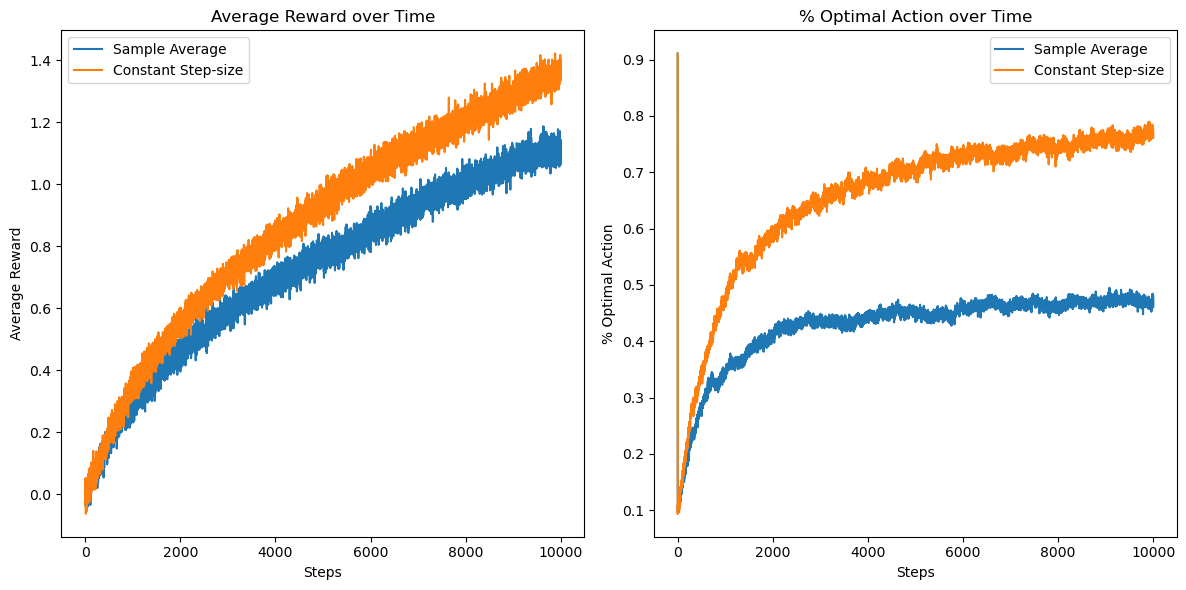

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
n_arms = 10
n_steps = 10000
n_runs = 2000
epsilon = 0.1
alpha = 0.1
random_walk_std = 0.01

def run_experiment(sample_average=False):
    rewards = np.zeros(n_steps)
    optimal_action_counts = np.zeros(n_steps)

    for _ in range(n_runs):
        q_true = np.zeros(n_arms)  # true action values
        q_estimates = np.zeros(n_arms)  # estimated action values
        action_counts = np.zeros(n_arms)  # action counts

        for step in range(n_steps):
            if np.random.rand() < epsilon:
                action = np.random.choice(n_arms)  # explore
            else:
                action = np.argmax(q_estimates)  # exploit

            reward = np.random.normal(q_true[action], 1)  # reward from a normal distribution
            action_counts[action] += 1

            if sample_average:
                q_estimates[action] += (reward - q_estimates[action]) / action_counts[action]
            else:
                q_estimates[action] += alpha * (reward - q_estimates[action])

            rewards[step] += reward
            optimal_action_counts[step] += (action == np.argmax(q_true))

            # Random walk for true action values
            q_true += np.random.normal(0, random_walk_std, n_arms)

    rewards /= n_runs
    optimal_action_counts /= n_runs

    return rewards, optimal_action_counts

# Run experiments
rewards_sample_average, optimal_action_counts_sample_average = run_experiment(sample_average=True)
rewards_constant_step, optimal_action_counts_constant_step = run_experiment(sample_average=False)

# Plot results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(rewards_sample_average, label='Sample Average')
plt.plot(rewards_constant_step, label='Constant Step-size')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend()
plt.title('Average Reward over Time')

plt.subplot(1, 2, 2)
plt.plot(optimal_action_counts_sample_average, label='Sample Average')
plt.plot(optimal_action_counts_constant_step, label='Constant Step-size')
plt.xlabel('Steps')
plt.ylabel('% Optimal Action')
plt.legend()
plt.title('% Optimal Action over Time')

plt.tight_layout()
plt.show()

### Explanation

1. **Initialization:**
   - Set the number of arms ($n\_arms$), steps ($n\_steps$), and runs ($n\_runs$).
   - Define $\epsilon$ and $\alpha$.

2. **Function `run_experiment`:**
   - Initialize rewards and optimal action counts for each step.
   - Loop over the number of runs to average out results.
   - For each step, select an action using $\epsilon$-greedy policy.
   - Update action-value estimates using either sample averages or a constant step-size parameter.
   - Simulate the random walk for the true action values.

3. **Plotting Results:**
   - Plot average reward over time.
   - Plot percentage of optimal action over time.

### Results

- **Average Reward Plot:** The plot should show that the constant step-size method performs better in the long run, maintaining higher rewards as it adapts more quickly to the nonstationary environment.
- **% Optimal Action Plot:** The plot should show that the constant step-size method selects the optimal action more frequently over time compared to the sample-average method, which struggles to keep up with the changing optimal actions due to the random walk.

This experiment demonstrates the challenges sample-average methods face in nonstationary environments and highlights the advantage of using a constant step-size parameter to adapt more quickly to changes.

## Exercise 2.6: Mysterious Spikes

### Explanation

1. **Optimistic Initial Values:**
   - In the optimistic method, the initial action-value estimates $Q(a)$ are set higher than the true action values. This encourages exploration because the agent initially believes all actions have high value and will try different actions to find the true values.

2. **High Initial Exploration:**
   - Due to the high initial estimates, the agent will quickly discover that the actual rewards are lower than its estimates. This leads to a rapid series of updates as it adjusts its estimates downward.

3. **Early Adjustments:**
   - In the early steps, as the agent receives rewards that are lower than its optimistic estimates, it rapidly updates its $Q$ values. This can cause significant swings in the action-value estimates as the agent corrects its overestimations. These corrections can lead to oscillations in the performance metrics (average reward and optimal action percentage).

4. **Discovery of the Best Action:**
   - The optimistic initialization causes the agent to try all actions early on, leading to a quicker identification of the best action. However, due to the randomness in the reward distribution and the nonstationary nature of the bandit problem, the identification process can be erratic, causing spikes in performance when the best action is discovered and exploited early.

5. **Impact of Random Walk:**
   - The nonstationary nature of the problem (random walk of true action values) means that the true value of actions changes over time. Early in the learning process, the agent might occasionally exploit an action that temporarily appears to be the best due to random fluctuations, causing temporary spikes in the performance metrics.

6. **High Variance:**
   - Because the optimistic method encourages extensive exploration, it naturally exhibits higher variance in the early steps. This higher variance can manifest as oscillations and spikes in the performance metrics, especially before the estimates start to stabilize.

### Summary

The oscillations and spikes in the early part of the curve for the optimistic method can be attributed to:
- The rapid adjustments of overestimated action values as the agent corrects its optimistic initial estimates.
- High initial exploration, which leads to significant swings in performance as the agent tries to find the best action.
- The nonstationary nature of the bandit problem, which causes true action values to change, leading to temporary spikes when the agent exploits a seemingly optimal action.

These factors combined result in the observed early instability in the performance metrics for the optimistic method. As the agent gathers more information and its estimates stabilize, the oscillations and spikes diminish, leading to more stable long-term performance.

## Exercise 2.7: Unbiased Constant-Step-Size Trick

We need to show that $Q_n$ is an exponential recency-weighted average without initial bias.

### Analysis

1. **Recursive Definition of $\bar{o}_n$:**

   From the given recursive formula:
   $$ \bar{o}_n = \bar{o}_{n-1} + \alpha (1 - \bar{o}_{n-1}) $$

   This can be rewritten as:
   $$ \bar{o}_n = (1 - \alpha) \bar{o}_{n-1} + \alpha $$

2. **Initial Value:**
   $$ \bar{o}_0 = 0 $$

3. **Solution to the Recursive Equation:**

   To find the closed-form solution for $\bar{o}_n$, we can iterate the equation:
   $$
   \begin{aligned}
   \bar{o}_1 &= \alpha, \\
   \bar{o}_2 &= (1 - \alpha) \alpha + \alpha = \alpha - \alpha^2 + \alpha = \alpha (1 + (1 - \alpha)), \\
   \bar{o}_3 &= (1 - \alpha) \alpha (1 + (1 - \alpha)) + \alpha = \alpha (1 + (1 - \alpha) + (1 - \alpha)^2), \\
   &\vdots \\
   \bar{o}_n &= \alpha \sum_{i=0}^{n-1} (1 - \alpha)^i.
   \end{aligned}
   $$

   Using the formula for the sum of a geometric series:
   $$
   \sum_{i=0}^{n-1} (1 - \alpha)^i = \frac{1 - (1 - \alpha)^n}{\alpha}.
   $$

   Thus:
   $$
   \bar{o}_n = \alpha \cdot \frac{1 - (1 - \alpha)^n}{\alpha} = 1 - (1 - \alpha)^n.
   $$

4. **Action-Value Update Using $\beta_n$:**

   The update rule for the action-value estimate $Q_n$ using the step size $\beta_n$ is:
   $$
   Q_{n+1} = Q_n + \beta_n (R_n - Q_n).
   $$

   Substituting $\beta_n$:
   $$
   Q_{n+1} = Q_n + \frac{\alpha}{\bar{o}_n} (R_n - Q_n).
   $$

5. **Recency-Weighted Average:**

   Using the fact that $\bar{o}_n = 1 - (1 - \alpha)^n$, the step size becomes:
   $$
   \beta_n = \frac{\alpha}{1 - (1 - \alpha)^n}.
   $$

   Initially, for large $n$, $\bar{o}_n$ approaches 1, so $\beta_n$ approaches $\alpha$. Thus, the step size $\beta_n$ dynamically adjusts to ensure that the early estimates are unbiased.

   We need to show that $Q_n$ is an exponential recency-weighted average:
   $$
   Q_n = \sum_{i=1}^n \beta_i (R_i - Q_{i-1}).
   $$

   The formula becomes:
   $$\begin{aligned}
   Q_{n+1} =& Q_n + \beta_n (R_n - Q_n)\\
           =& (1 - \beta_n) Q_n + \beta_n R_n.
   \end{aligned}
   $$

   This form ensures that $Q_{n+1}$ depends more on recent rewards, with older rewards having exponentially less influence, achieving an exponential recency-weighted average without initial bias.

### Conclusion

By using the step-size trick:
$$ \beta_n \doteq \frac{\alpha}{1 - (1 - \alpha)^n}, $$
we ensure that $Q_n$ is an exponential recency-weighted average without initial bias, maintaining the advantages of constant step sizes in nonstationary problems while avoiding initial bias.

## Exercise 2.8: UCB Spikes

### Analysis of the Spike on the 11th Step

#### 1. **Initial Exploration Phase:**
   - During the first 10 steps, the UCB algorithm ensures that each action is selected at least once due to the $ \sqrt{\frac{\ln t}{N_t(a)}} $ term. This term is initially very large for actions that have not been selected, forcing the algorithm to explore all actions.
   - At this stage, the algorithm gathers initial reward estimates for each action.

#### 2. **Step 11:**
   - By the 11th step, each of the 10 actions has been selected exactly once.
   - The $ \sqrt{\frac{\ln t}{N_t(a)}} $ term becomes equal for all actions because $ N_t(a) = 1 $ for all $ a $ and $ t = 11 $.
   - The algorithm then relies more on the estimated value $ Q_t(a) $ to decide the next action.
   - Since the initial exploration might have revealed an action with a significantly higher reward, this action is likely to be selected again at step 11, leading to a potential spike in the average reward.

#### 3. **Subsequent Steps:**
   - After step 11, the UCB algorithm continues to balance exploration and exploitation.
   - The actions with higher $ Q_t(a) $ will be selected more frequently, but the $ \sqrt{\frac{\ln t}{N_t(a)}} $ term ensures that less frequently chosen actions are still explored.
   - This balancing act can lead to a temporary decrease in average reward as the algorithm continues to explore and gather more information about all actions, especially if some of the initially high-reward actions turn out to be suboptimal upon further sampling.

### Why the Spike is Less Prominent for $ c = 1 $

- The parameter $ c $ controls the amount of exploration. A lower value of $ c $ means less emphasis on exploration.
- When $ c = 1 $, the exploration term $ c \sqrt{\frac{\ln t}{N_t(a)}} $ is smaller, so the algorithm relies more on the estimated values $ Q_t(a) $.
- This makes the exploration-exploitation balance less aggressive, resulting in smoother transitions and less pronounced spikes in performance.

### Conclusion

The spike in the UCB algorithm's performance on the 11th step occurs because:
- The algorithm ensures each action is chosen at least once during the first 10 steps.
- On the 11th step, the algorithm starts favoring the action with the highest estimated reward based on the initial exploration.
- The subsequent decline happens as the algorithm continues to explore and refine its estimates, occasionally choosing suboptimal actions to ensure it gathers enough information.

By controlling the exploration parameter $ c $, we can make the spike less prominent, as a lower $ c $ value results in less aggressive exploration, leading to smoother performance curves.

## Exercise 2.9

The softmax function for two actions $a_1$ and $a_2$ with corresponding action values $q_1$ and $q_2$ is given by:

$$ P(a_1) = \frac{e^{q_1}}{e^{q_1} + e^{q_2}} $$
$$ P(a_2) = \frac{e^{q_2}}{e^{q_1} + e^{q_2}} $$

Let's consider $P(a_1)$:

$$ P(a_1) = \frac{e^{q_1}}{e^{q_1} + e^{q_2}} $$

We can rewrite the denominator by factoring out $e^{q_1}$:

$$ P(a_1) = \frac{e^{q_1}}{e^{q_1}(1 + e^{q_2 - q_1})} = \frac{1}{1 + e^{q_2 - q_1}} $$

The logistic (or sigmoid) function is defined as:

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

If we let $ x = q_1 - q_2 $, then:

$$ \sigma(q_1 - q_2) = \frac{1}{1 + e^{-(q_1 - q_2)}} = \frac{1}{1 + e^{q_2 - q_1}} $$

Thus, we can see that:

$$ P(a_1) = \sigma(q_1 - q_2) $$

Similarly, for $P(a_2)$:

$$ P(a_2) = \frac{e^{q_2}}{e^{q_1} + e^{q_2}} = \frac{e^{q_2}}{e^{q_2}(1 + e^{q_1 - q_2})} = \frac{1}{1 + e^{q_1 - q_2}} $$

This can also be written as:

$$ P(a_2) = \sigma(q_2 - q_1) $$

Since $\sigma(x)$ and $\sigma(-x)$ are complementary (i.e., $\sigma(x) + \sigma(-x) = 1$), we see that:

$$ \sigma(q_1 - q_2) + \sigma(q_2 - q_1) = 1 $$

Therefore, the softmax distribution for two actions indeed reduces to the logistic or sigmoid function often used in statistics and artificial neural networks.

## Exercise 2.10

### Problem Breakdown
You face a 2-armed bandit task with two possible cases for the true action values:

- **Case A**: Action 1 has a value of 10, and Action 2 has a value of 20.
- **Case B**: Action 1 has a value of 90, and Action 2 has a value of 80.

Each case occurs with a probability of 0.5, and you do not know which case you are facing at any time step. However, you are told whether you are facing case A or case B.

### Part 1: Best Expected Reward Without Knowing the Case
If you do not know which case you are facing at any step, you need to determine the best expected reward by considering the average rewards for each action across both cases.

#### Expected Reward Calculation
For **Action 1**:
- Case A: Value = 10
- Case B: Value = 90

The expected reward for Action 1 is:
$$ E[R_1] = 0.5 \times 10 + 0.5 \times 90 = 5 + 45 = 50 $$

For **Action 2**:
- Case A: Value = 20
- Case B: Value = 80

The expected reward for Action 2 is:
$$ E[R_2] = 0.5 \times 20 + 0.5 \times 80 = 10 + 40 = 50 $$

Since both actions have the same expected reward of 50, if you do not know the case, either action can be chosen, and you will achieve an expected reward of 50.

### Part 2: Best Expected Reward When Knowing the Case
Now, suppose you know whether you are in Case A or Case B, but still do not know the exact values of the actions. This becomes an associative search task.

#### Strategy
- **Case A**: Choose Action 2 because it has the higher value (20 vs. 10).
- **Case B**: Choose Action 1 because it has the higher value (90 vs. 80).

By following this strategy, you always choose the action with the highest reward in the given case.

#### Expected Reward Calculation
For **Case A**:
- Action chosen: Action 2
- Reward: 20

For **Case B**:
- Action chosen: Action 1
- Reward: 90

Since each case occurs with a probability of 0.5, the best expected reward is:
$$ E[R] = 0.5 \times 20 + 0.5 \times 90 = 10 + 45 = 55 $$

### Summary
- If you do not know which case you are facing, choose either action to achieve an expected reward of 50.
- If you know whether you are in Case A or Case B, choose the action with the higher value for that case to achieve an expected reward of 55.

Thus, the best expected reward you can achieve in this task is 55 by choosing the optimal action for each case.

## Exercise 2.11

Average reward over the last 100,000 steps: 8.252473558419583


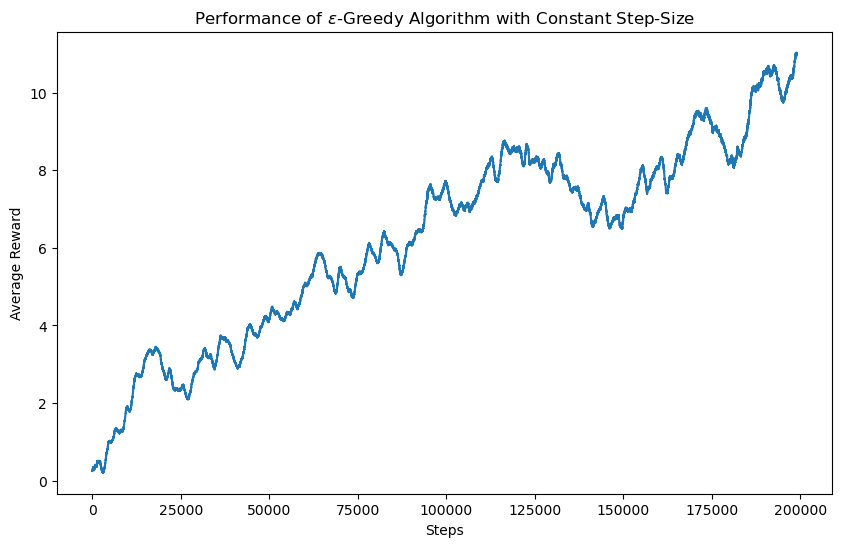

In [104]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_actions = 10
num_steps = 200000
alpha = 0.1
epsilon = 0.1

# Nonstationary bandit problem
class NonstationaryBandit:
    def __init__(self, num_actions):
        self.num_actions = num_actions
        self.q_true = np.zeros(num_actions)
    
    def step(self, action):
        reward = np.random.randn() + self.q_true[action]
        self.q_true += np.random.normal(0, 0.01, self.num_actions) # True rewards change slowly
        return reward

# Epsilon-greedy algorithm with constant step-size
def epsilon_greedy_bandit(alpha, epsilon, num_actions, num_steps):
    bandit = NonstationaryBandit(num_actions)
    q_estimates = np.zeros(num_actions)
    rewards = np.zeros(num_steps)
    
    for step in range(num_steps):
        if np.random.rand() < epsilon:
            action = np.random.choice(num_actions)
        else:
            action = np.argmax(q_estimates)
        
        reward = bandit.step(action)
        q_estimates[action] += alpha * (reward - q_estimates[action])
        rewards[step] = reward
    
    return rewards

# Run the simulation
rewards = epsilon_greedy_bandit(alpha, epsilon, num_actions, num_steps)

# Calculate average reward over the last 100,000 steps
average_reward_last_100k = np.mean(rewards[-100000:])

print(f"Average reward over the last 100,000 steps: {average_reward_last_100k}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(np.convolve(rewards, np.ones(1000)/1000, mode='valid'))
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Performance of $\epsilon$-Greedy Algorithm with Constant Step-Size')
plt.show()